In [1]:
#K-means

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=3, random_state=23)

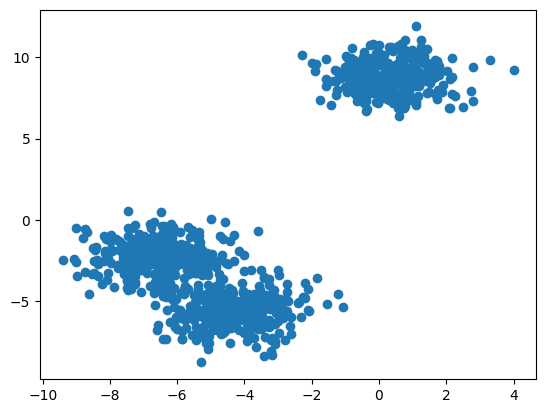

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test, y_train,y_test =train_test_split(X,y,test_size=0.33, random_state=42)

In [16]:
from sklearn.cluster import KMeans

In [17]:
# Manual process
#Elbow Method to slect the k value

In [20]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [21]:
wcss

[35156.62375133758,
 4056.737001934891,
 2051.6238264774297,
 1857.2220825804673,
 1731.5662994288605,
 1568.1158714343273,
 1456.7693935077943,
 1344.1337739561593,
 1259.912421224296,
 1175.7917942039303]

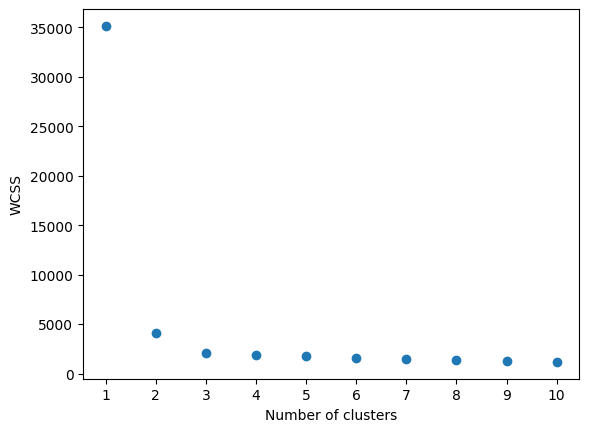

In [24]:
plt.scatter(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [25]:
#from above graph, we can see at K=3 wcss is becoming stable

In [32]:
kmeans=KMeans(n_clusters =3, init = 'k-means++')
y_lables=kmeans.fit_predict(X_train, )

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


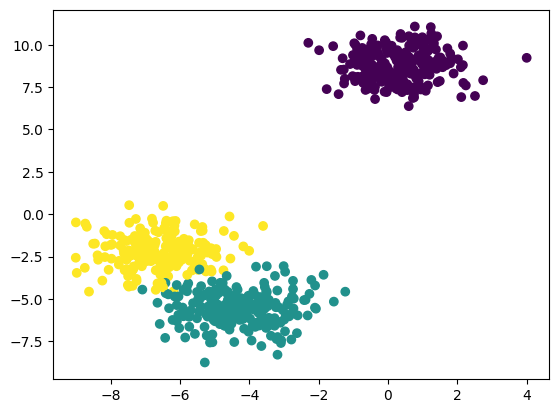

In [33]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_lables)

In [35]:
y_test_labels = kmeans.predict(X_test)

In [36]:
y_test_labels

array([1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 0,
       2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2,
       2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1,

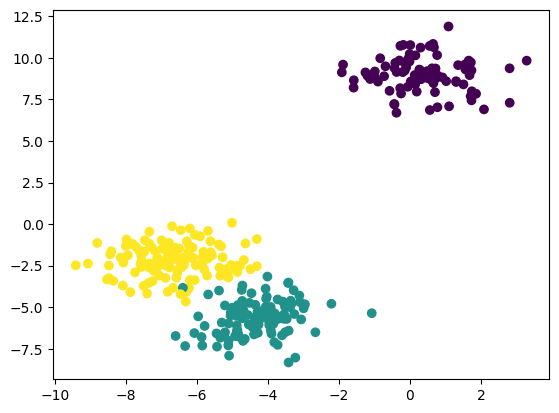

In [38]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test_labels)

In [39]:
#Automated process to find the value of K
#Knee Locator library
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [40]:
from kneed import KneeLocator

In [41]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')

In [42]:
kl.elbow

2

In [43]:
# performance metrics
# Silhoute score

In [44]:
from sklearn.metrics import silhouette_score

In [46]:
s_c=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    s_c.append(score)

C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Saura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [47]:
s_c

[0.7846888976766125,
 0.6271861583341151,
 0.527114256973615,
 0.29429421619709906,
 0.23610703884349227,
 0.2276251822532346,
 0.22570150454353882,
 0.23526601408263478,
 0.23442721648426848]

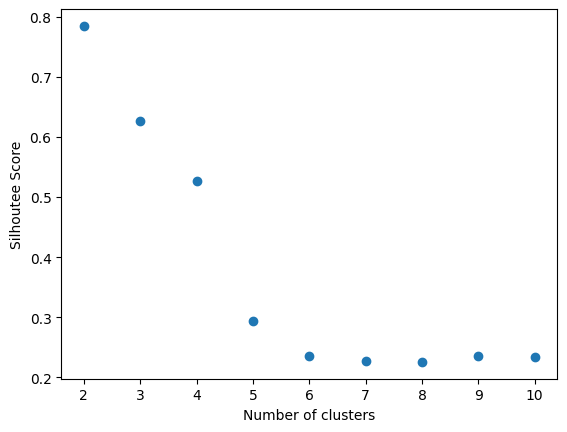

In [49]:
plt.scatter(range(2,11),s_c)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutee Score")
plt.show()

In [50]:
#hirerchial clustering

In [54]:
from sklearn import datasets

In [55]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [60]:
iris_data=pd.DataFrame(iris.data)

In [61]:
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
iris_data.columns=iris.feature_names

In [63]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
#we need to convert 4 features to 2 featurs. For this we will do feature scaling and then PCA

In [65]:
#standardization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
X_scaled= scaler.fit_transform(iris_data)

In [68]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [69]:
X_scaled.shape

(150, 4)

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA(n_components=2)

In [72]:
pca_scaled=pca.fit_transform(X_scaled)

In [73]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

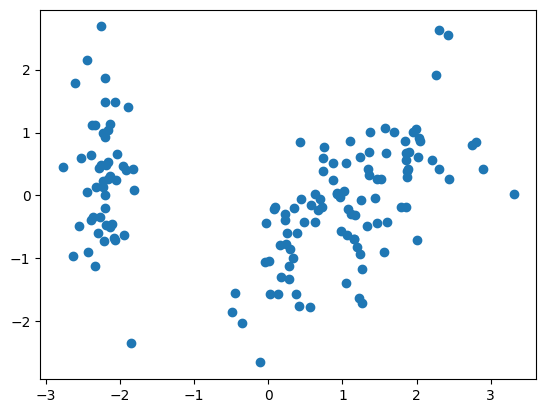

In [76]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

In [77]:
#Agglomerative Clustering- one of the type of hirerchial clustering
#to consutruct dendogram we use scipy library

In [78]:
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Eucledian Distance')

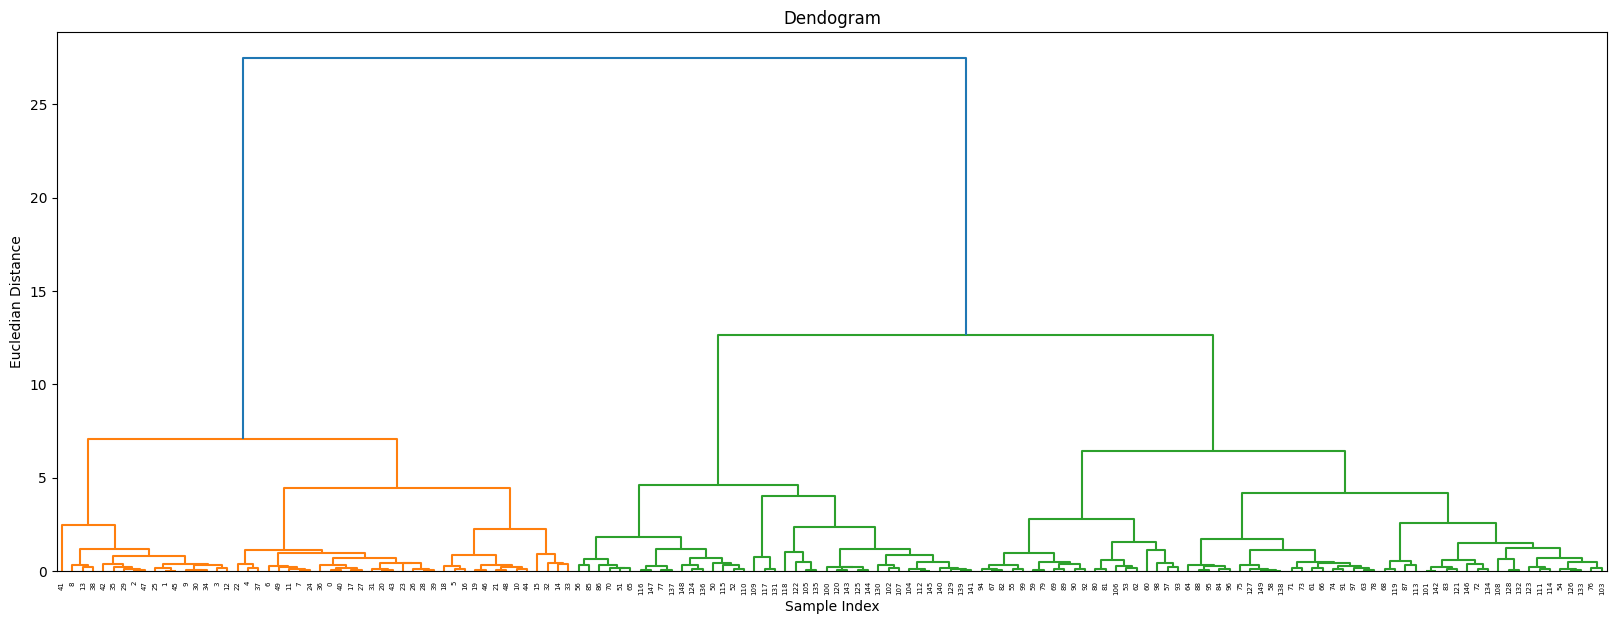

In [81]:
#plot dendogram
plt.figure(figsize=(20,7))
plt.title("Dendogram")
#create dendogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title("Dendogram")
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [83]:
#in above digram, the longest vertical line such that no horizontal line passes through it shows:
#threshold cluster vale should be 2
clusters= AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters.fit(pca_scaled)

AgglomerativeClustering()

In [84]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

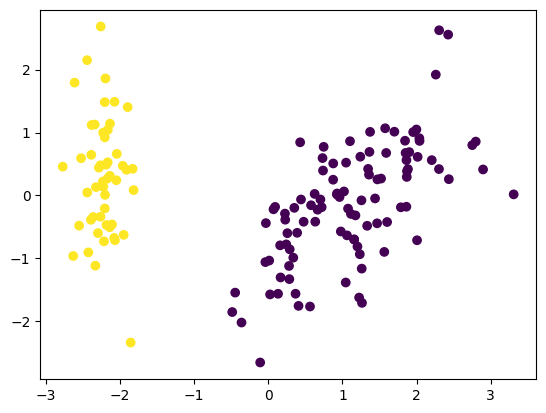

In [85]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=clusters.labels_)

In [86]:
s_c=[]
for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo.fit(pca_scaled)
    score=silhouette_score(pca_scaled,agglo.labels_)
    s_c.append(score)

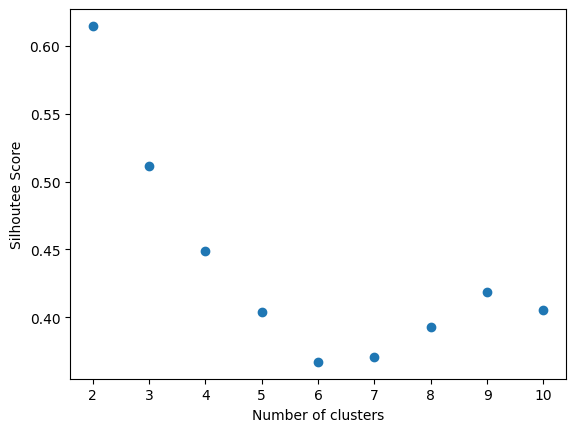

In [87]:
plt.scatter(range(2,11),s_c)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutee Score")
plt.show()

In [88]:
#DBScan
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
Xt,y = make_moons(n_samples=250, noise=0.08)

In [173]:
y

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

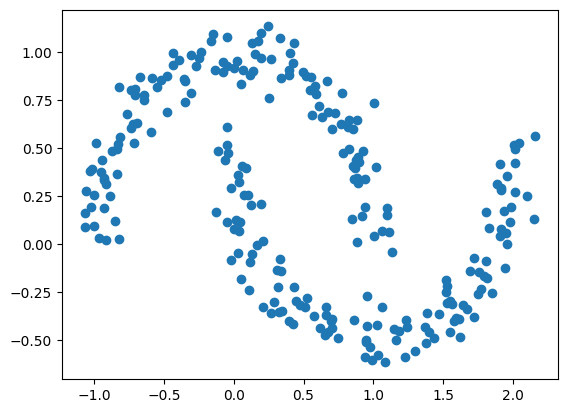

In [174]:
plt.scatter(Xt[:,0], Xt[:,1])

In [175]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [176]:
X_scaled=scaler.fit_transform(Xt)

In [177]:
dbscan=DBSCAN(eps=0.3)

In [178]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.3)

In [179]:
dbscan.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

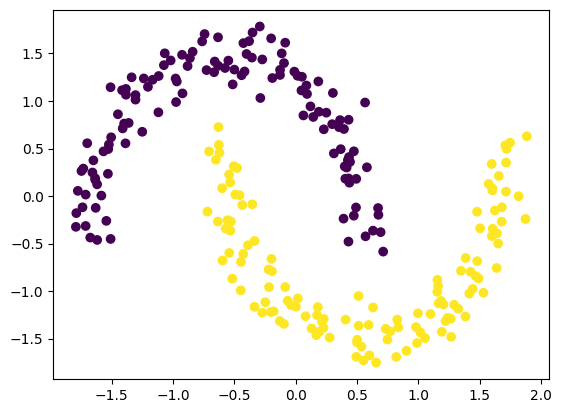

In [180]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=dbscan.labels_)

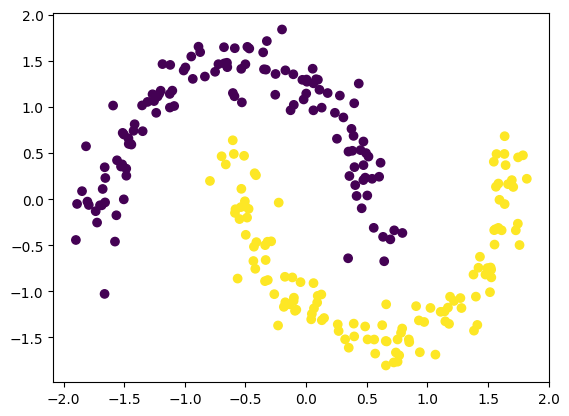

In [153]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)